<img src="https://i0.wp.com/insights-on.com/wp-content/uploads/2021/03/10-sn56-20201221-titanicsinking-hr.jpg?fit=1440%2C804&ssl=1">

## Introduction
The sinking of the RMS Titanic in 1912 is a tragic tale of opulence and disaster. On its maiden voyage, the "unsinkable" ship struck an iceberg, leading to the loss of over 1,500 lives. Despite advanced safety features, including watertight compartments, the combination of excessive speed, insufficient lifeboats, and class-based evacuation policies proved fatal. The diverse passenger and crew makeup, ranging from wealthy elites to hopeful immigrants, adds to the poignancy. This maritime catastrophe prompted significant changes in safety regulations and remains a somber reminder of human vulnerability in the face of nature's forces, echoing through history and popular culture.

In [1]:
# Titanic Survival

# **1 import Necessary Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# **2 import Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# **3 Data Analysis**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.ndim

2

# **4 Data cleaning and Preprocessing:**

In [11]:
# Data preprocessing
df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(1, inplace=True)

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')

In [15]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22.0,1.0,2
1,1,1,1,38.0,2.0,2
2,1,3,1,26.0,1.0,1
3,1,1,1,35.0,1.0,2
4,0,3,0,35.0,1.0,1


In [16]:
# Define features and target variable
x = df[['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]
y = df['Survived']

In [17]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Embarked    False
Family      False
dtype: bool

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Embarked    float64
Family        int64
dtype: object

In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<a id="4"></a>

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">5| Data visualisation 📊 📉
    
</div>

## EDA (Exploratory Data Analysis)

## 5.1 displot

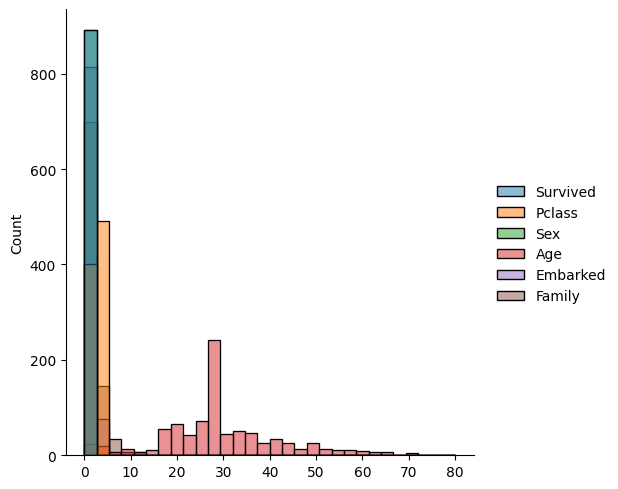

In [20]:
sns.displot(df, kde=False, bins=30)
plt.show()

## 5.2 Scatter Plot

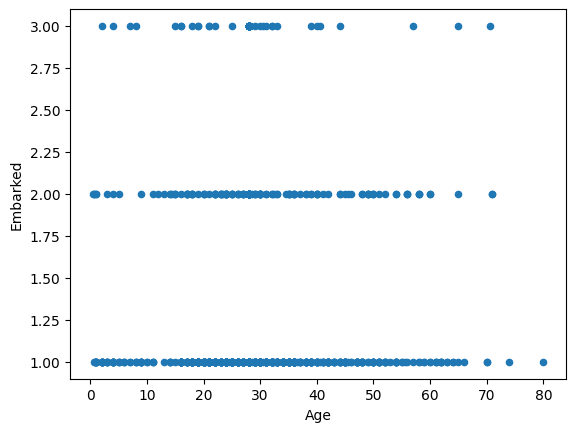

In [21]:
df.plot(kind='scatter', x='Age', y='Embarked')
plt.show()

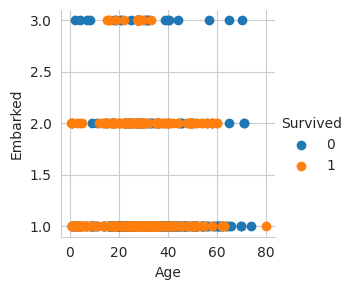

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survived").map(plt.scatter, "Age", "Embarked").add_legend();
plt.show();

## 5.3 boxplot

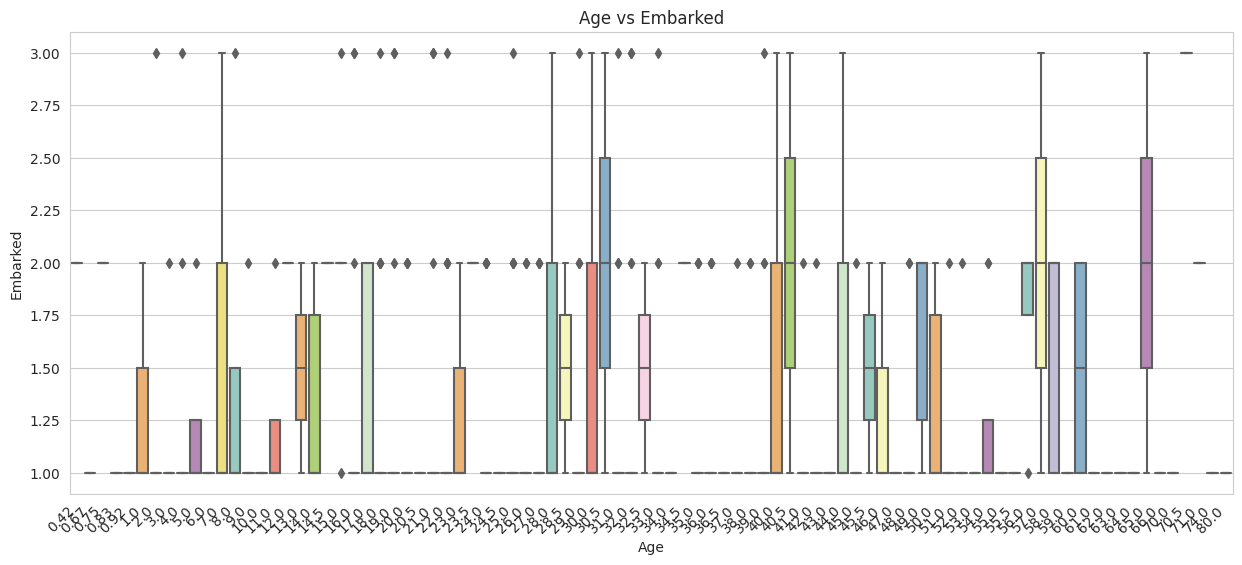

In [23]:
# sepal_length vs sepal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Embarked', data=df, palette='Set3')
plt.title('Age vs Embarked')
plt.xlabel('Age')
plt.ylabel('Embarked')
plt.xticks(rotation=45, ha='right')
plt.show()

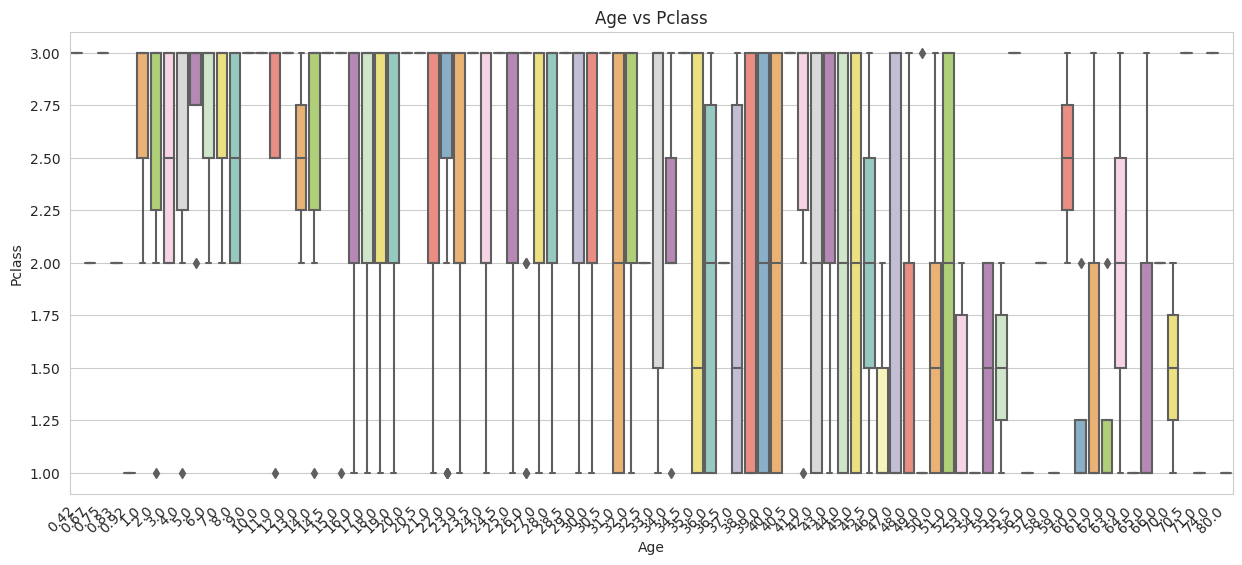

In [24]:
# petal_length vs petal_width boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Pclass', data=df, palette='Set3')
plt.title('Age vs Pclass')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5.4 countplot

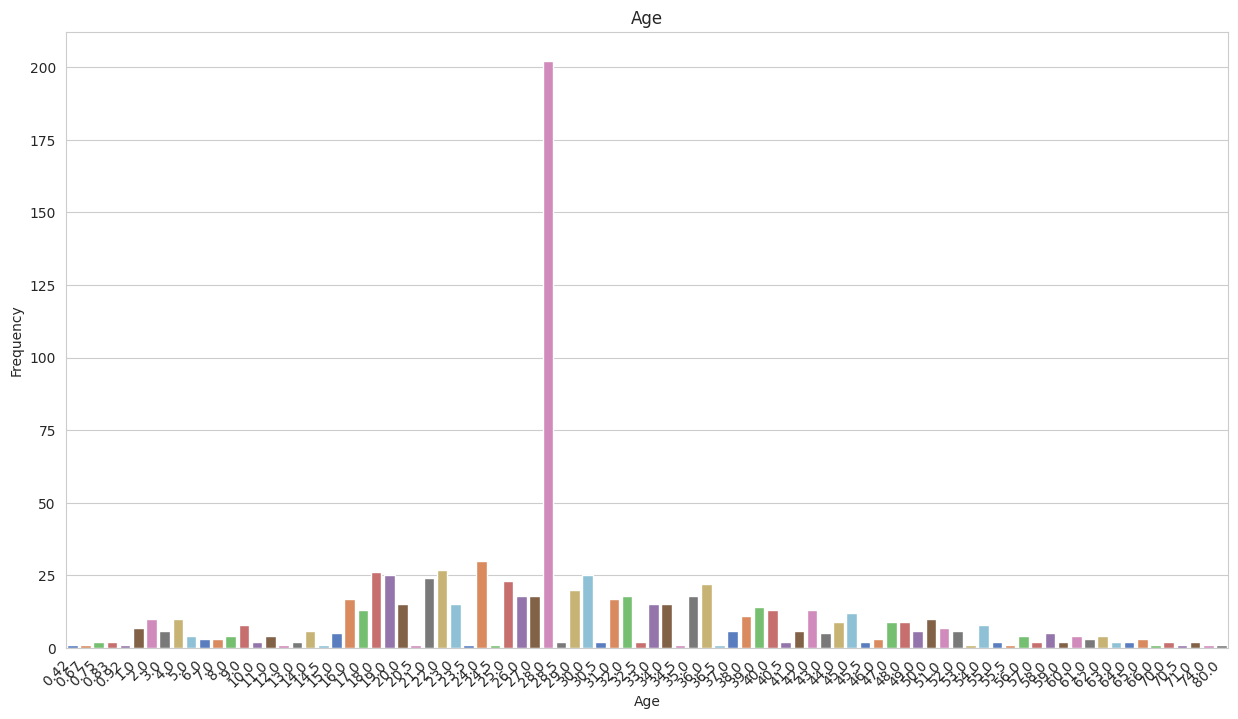

In [25]:
# sepal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Age', data=df, palette='muted')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

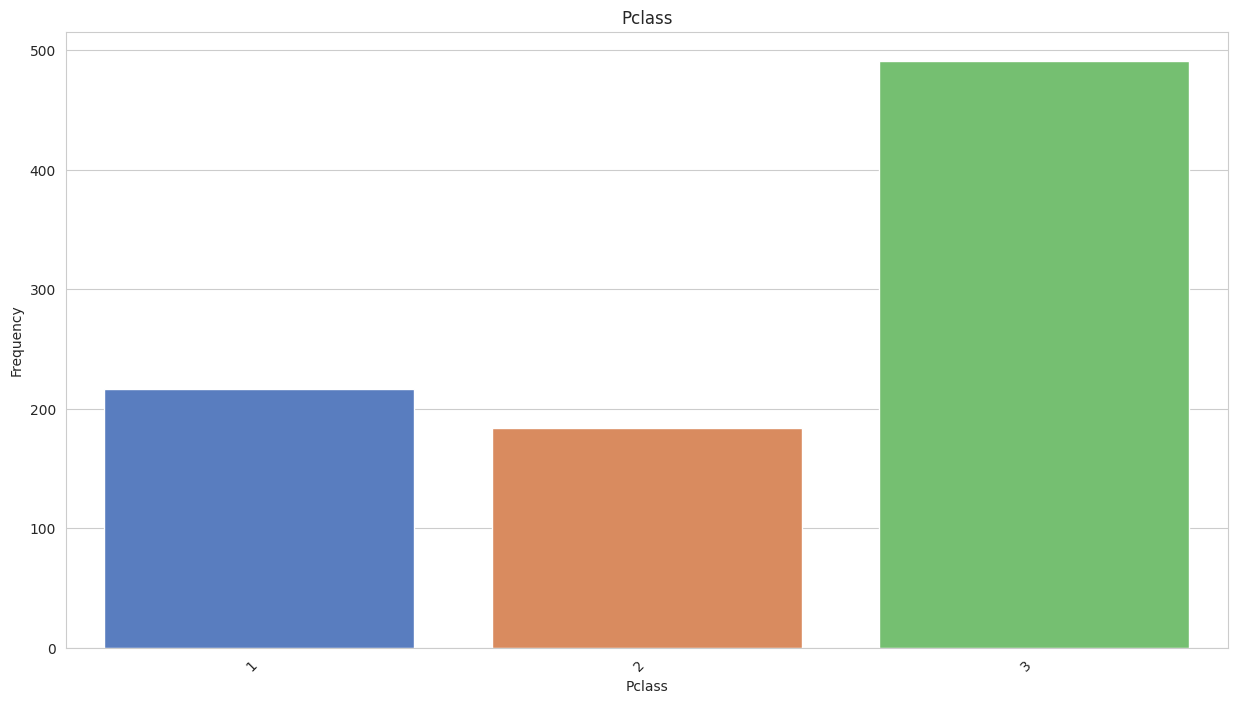

In [26]:
# sepal_width
plt.figure(figsize=(15, 8))
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title('Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

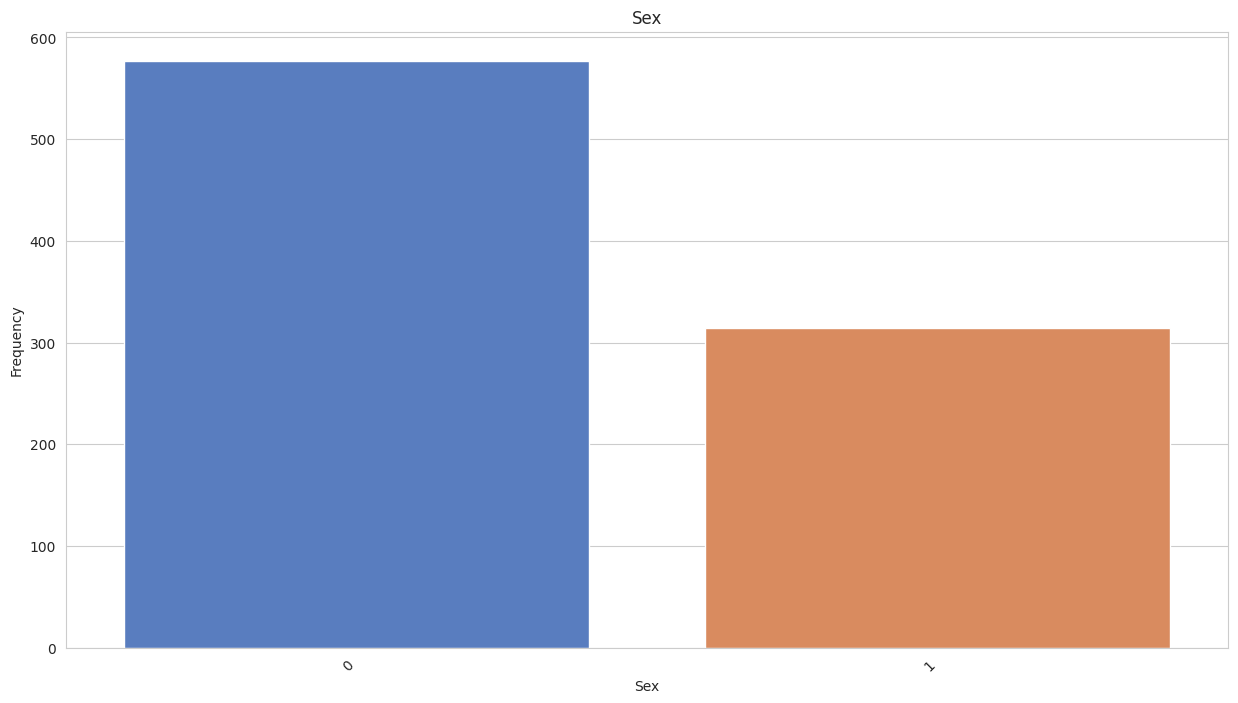

In [27]:
# petal_length
plt.figure(figsize=(15, 8))
sns.countplot(x='Sex', data=df, palette='muted')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

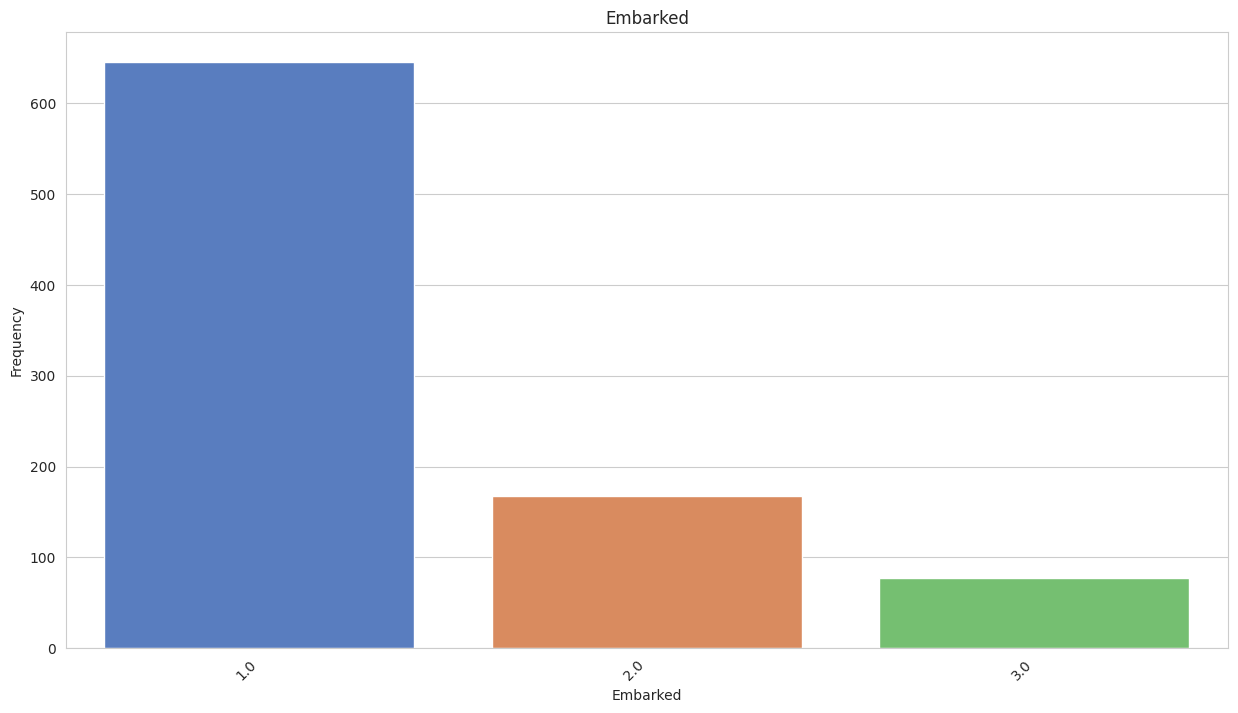

In [28]:
# sepal_width
plt.figure(figsize=(15, 8))
sns.countplot(x='Embarked', data=df, palette='muted')
plt.title('Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5.5 pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


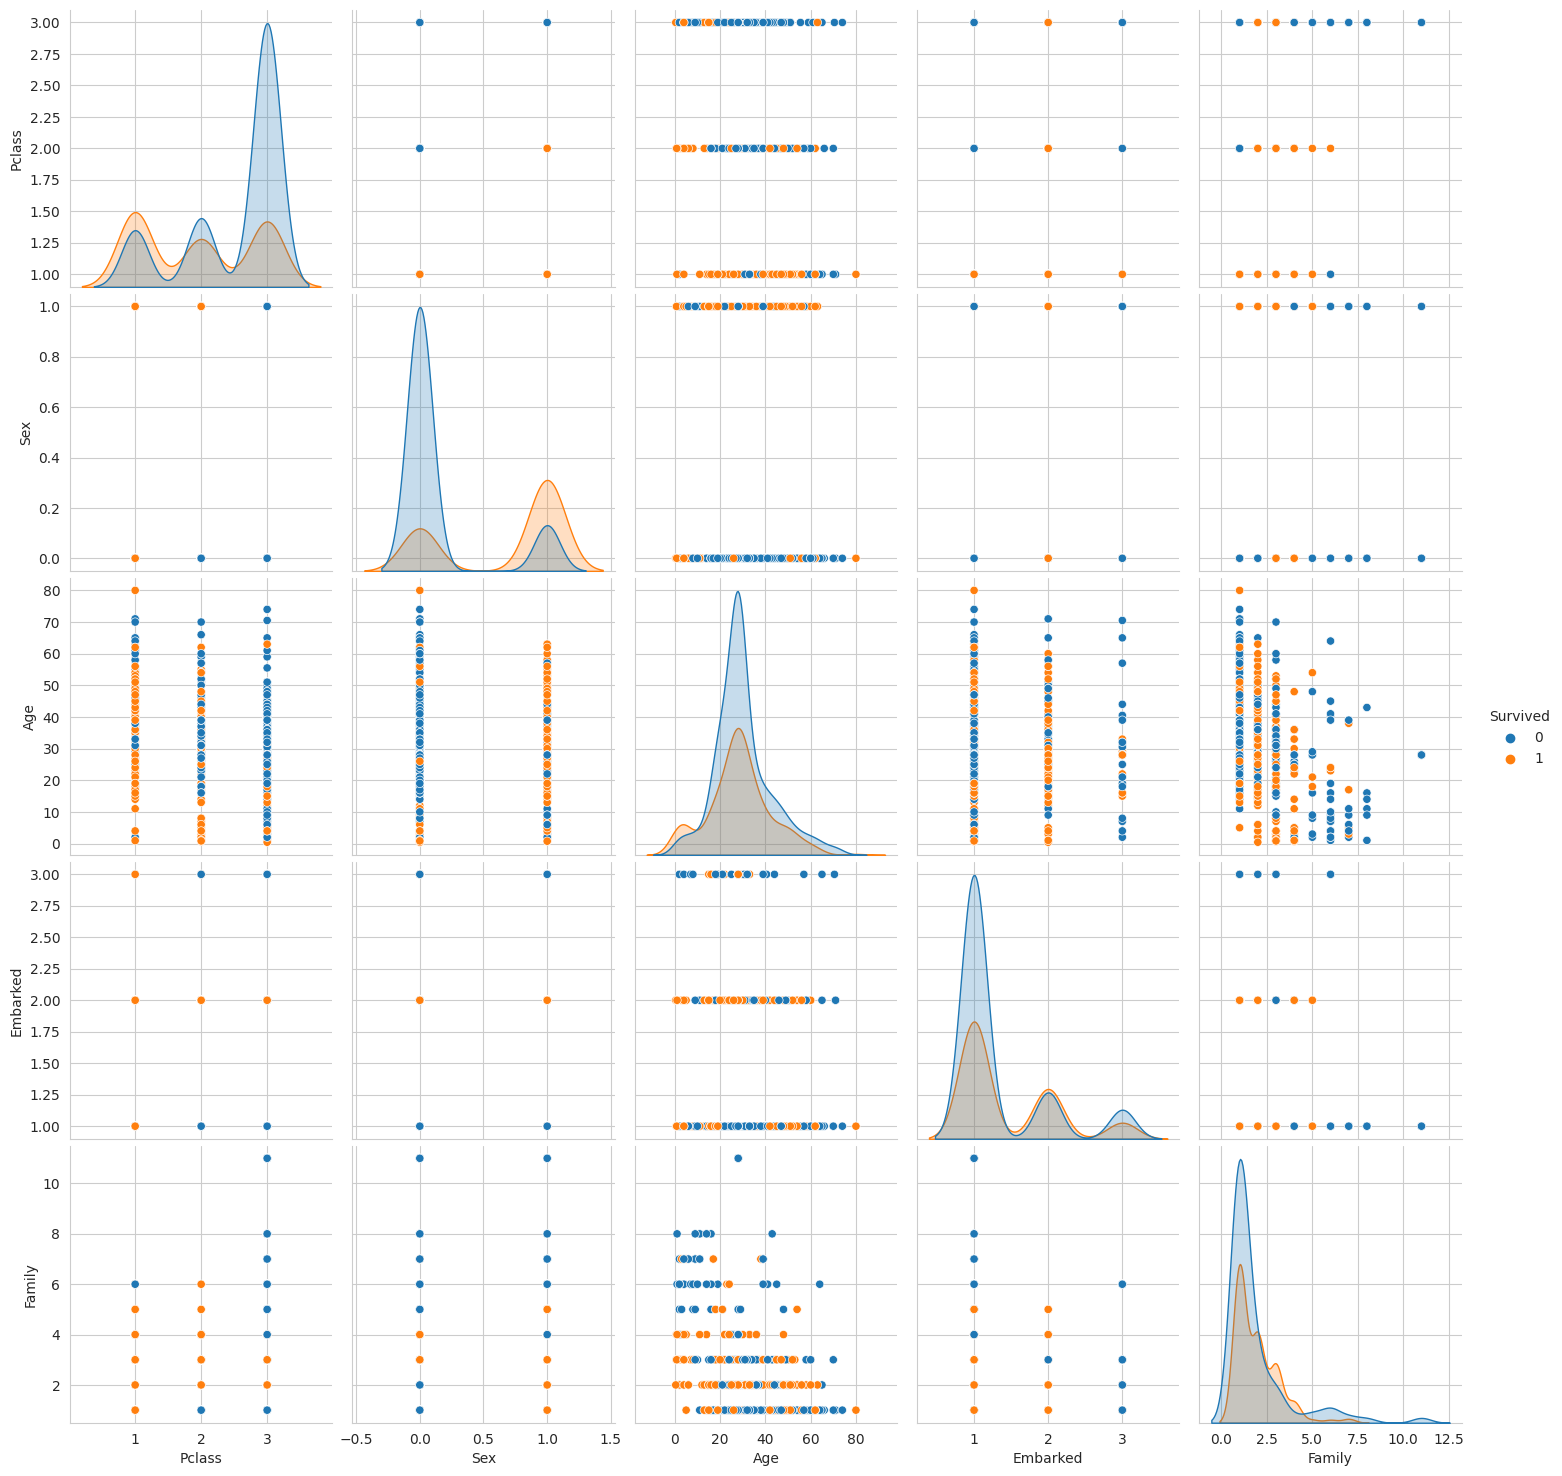

In [29]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Survived", size=3)
plt.show()

## 5.6 Hist Plot

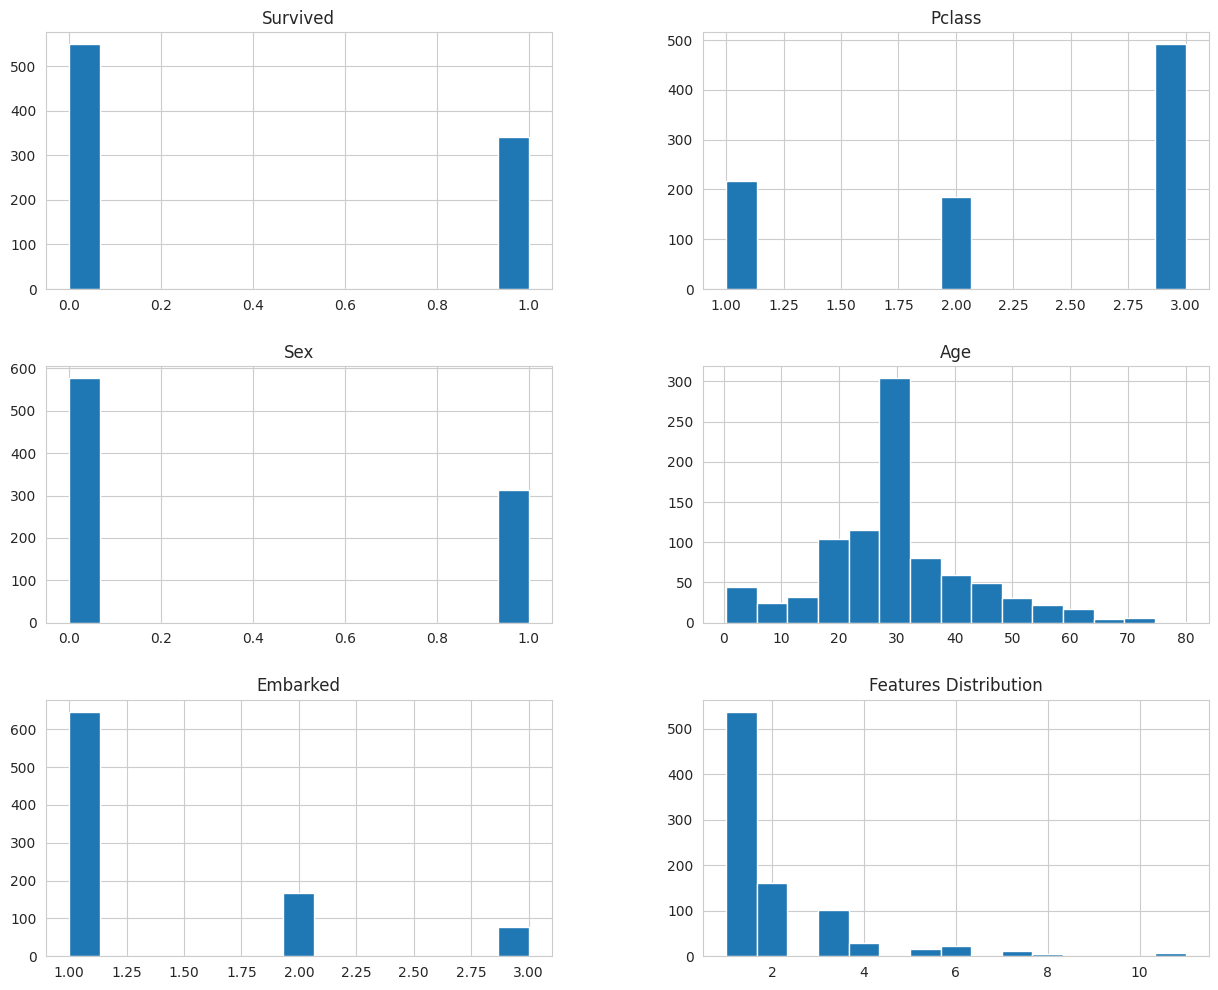

In [30]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## 5.7 violinplot

<Axes: xlabel='Survived', ylabel='Pclass'>

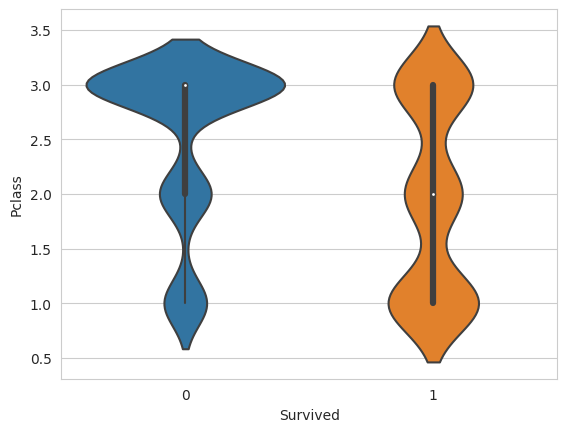

In [31]:
sns.violinplot(x="Survived",y="Pclass", data=df, size = 8)

<Axes: xlabel='Survived', ylabel='Sex'>

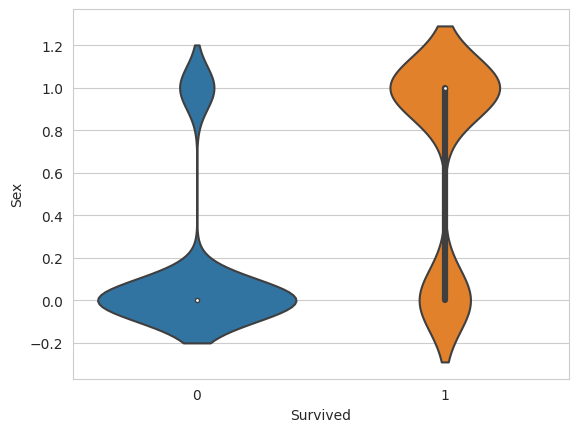

In [32]:
sns.violinplot(x="Survived",y="Sex", data=df, size = 8)

<Axes: xlabel='Survived', ylabel='Age'>

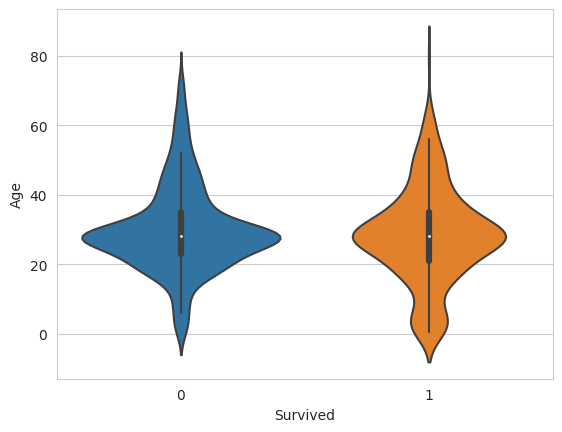

In [33]:
sns.violinplot(x="Survived",y="Age", data=df, size = 8)

<Axes: xlabel='Survived', ylabel='Embarked'>

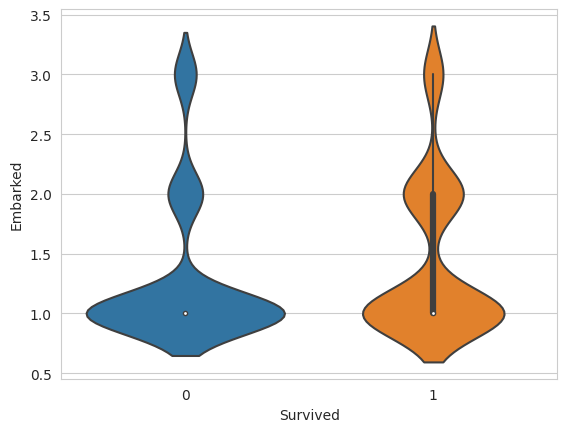

In [34]:
sns.violinplot(x="Survived",y="Embarked", data=df, size = 8)

<Axes: xlabel='Survived', ylabel='Family'>

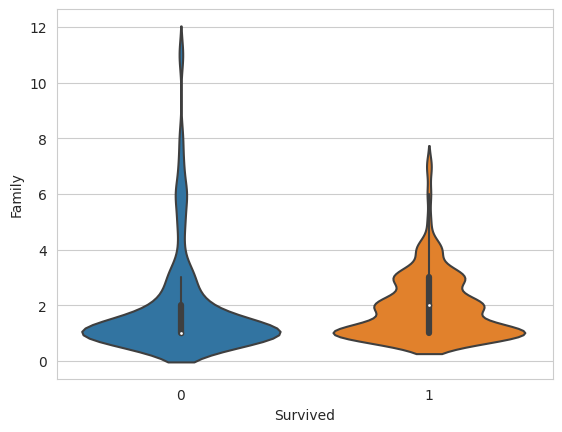

In [35]:
sns.violinplot(x="Survived",y="Family", data=df, size = 8)

## 5.8 Pie Plot

In [36]:
# ax=plt.subplots(1,1,figsize=(10,8))
# df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
# plt.title("Iris Species %")
# plt.show()

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">6 | Split the Dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22.0,1.0,2
1,1,1,1,38.0,2.0,2
2,1,3,1,26.0,1.0,1
3,1,1,1,35.0,1.0,2
4,0,3,0,35.0,1.0,1


In [39]:
X = df[["Pclass", "Sex", "Age", "Embarked","Family"]]

In [40]:
y = df['Survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 5), (179, 5), (712,), (179,))

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">7 | PCA (Principal Component Analysis) </div>

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)

In [45]:
pca

PCA(n_components=2)

In [46]:
X_pca = pca.fit_transform(X)

In [47]:
X_pca[0]

array([-7.37313857, -0.14876855])

In [48]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.97870884 0.01416231]


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [50]:
X[0]

array([1.        , 0.        , 0.27117366, 0.        , 0.1       ])

In [51]:
X[1]

array([0.       , 1.       , 0.4722292, 0.5      , 0.1      ])

# Algorithm 🔄

## (1) KNN 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [54]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
train_predictions = knn_classifier.predict(X_train)

train_accuracy1 = accuracy_score(y_train, train_predictions)

In [56]:
test_predictions = knn_classifier.predict(X_test)

test_accuracy1 = accuracy_score(y_test, test_predictions)

In [57]:
print(f"Training Accuracy: {train_accuracy1}")
print(f"Testing Accuracy: {test_accuracy1}")

Training Accuracy: 0.8553370786516854
Testing Accuracy: 0.770949720670391


## (2) Naive Bayes classifier 🔄

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [59]:
# GaussianNB

In [60]:
G_classifier = GaussianNB()

In [61]:
G_classifier.fit(X_train, y_train)

GaussianNB()

In [62]:
train_predictions = G_classifier.predict(X_train)

train_accuracy21 = accuracy_score(y_train, train_predictions)

In [63]:
test_predictions = G_classifier.predict(X_test)

test_accuracy21 = accuracy_score(y_test, test_predictions)

In [64]:
print(f"Training Accuracy: {train_accuracy21}")
print(f"Testing Accuracy: {test_accuracy21}")

Training Accuracy: 0.7935393258426966
Testing Accuracy: 0.7653631284916201


In [65]:
# BernoulliNB

In [66]:
B_classifier = BernoulliNB()

In [67]:
B_classifier.fit(X_train, y_train)

BernoulliNB()

In [68]:
train_predictions = B_classifier.predict(X_train)

train_accuracy22 = accuracy_score(y_train, train_predictions)

In [69]:
test_predictions = G_classifier.predict(X_test)

test_accuracy22 = accuracy_score(y_test, test_predictions)

In [70]:
print(f"Training Accuracy: {train_accuracy22}")
print(f"Testing Accuracy: {test_accuracy22}")

Training Accuracy: 0.7879213483146067
Testing Accuracy: 0.7653631284916201


In [71]:
# MultinomialNB

In [72]:
M_classifier = MultinomialNB()

In [73]:
M_classifier.fit(X_train, y_train)

MultinomialNB()

In [74]:
train_predictions = M_classifier.predict(X_train)

train_accuracy23 = accuracy_score(y_train, train_predictions)

In [75]:
test_predictions = M_classifier.predict(X_test)

test_accuracy23 = accuracy_score(y_test, test_predictions)

In [76]:
print(f"Training Accuracy: {train_accuracy23}")
print(f"Testing Accuracy: {test_accuracy23}")

Training Accuracy: 0.7865168539325843
Testing Accuracy: 0.7821229050279329


In [77]:
# GaussianNB
# BernoulliNB
# MultinomialNB

# Being the best of them | GaussianNB |

# (3) Decision Tree 🔄

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
clf = DecisionTreeClassifier()

In [80]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
train_predictions = clf.predict(X_train)

train_accuracy3 = accuracy_score(y_train, train_predictions)

In [82]:
test_predictions = clf.predict(X_test)

test_accuracy3 = accuracy_score(y_test, test_predictions)

In [83]:
print(f"Training Accuracy: {train_accuracy3}")
print(f"Testing Accuracy: {test_accuracy3}")

Training Accuracy: 0.9339887640449438
Testing Accuracy: 0.7932960893854749


# (4) Random Forest 🔄

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
train_predictions = rf_classifier.predict(X_train)

train_accuracy4 = accuracy_score(y_train, train_predictions)

In [88]:
test_predictions = rf_classifier.predict(X_test)

test_accuracy4 = accuracy_score(y_test, test_predictions)

In [89]:
print(f"Training Accuracy: {train_accuracy4}")
print(f"Testing Accuracy: {test_accuracy4}")

Training Accuracy: 0.9339887640449438
Testing Accuracy: 0.8212290502793296


# (5) Boosting Algorithm 🔄

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
base_classifier = DecisionTreeClassifier(max_depth=3)

In [92]:
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [93]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=42)

In [94]:
train_predictions = adaboost_classifier.predict(X_train)

train_accuracy5 = accuracy_score(y_train, train_predictions)

In [95]:
test_predictions = adaboost_classifier.predict(X_test)

test_accuracy5 = accuracy_score(y_test, test_predictions)

In [96]:
print(f"Training Accuracy: {train_accuracy5}")
print(f"Testing Accuracy: {test_accuracy5}")

Training Accuracy: 0.925561797752809
Testing Accuracy: 0.7877094972067039


# **(6).SVM**

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [100]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [101]:
train_predictions = svm_classifier.predict(X_train)

train_accuracy6 = accuracy_score(y_train, train_predictions)

In [102]:
test_predictions = svm_classifier.predict(X_test)

test_accuracy6 = accuracy_score(y_test, test_predictions)

In [103]:
print(f"Training Accuracy: {train_accuracy6}")
print(f"Testing Accuracy: {test_accuracy6}")

Training Accuracy: 0.7879213483146067
Testing Accuracy: 0.7821229050279329


# **(7). Logistic Regression**

In [104]:
from sklearn import linear_model

In [105]:
lrg = linear_model.LogisticRegression()

In [106]:
lrg.fit(X_train, y_train)

LogisticRegression()

In [107]:
train_predictions = lrg.predict(X_train)

train_accuracy7 = accuracy_score(y_train, train_predictions)

In [108]:
test_predictions = lrg.predict(X_test)

test_accuracy7 = accuracy_score(y_test, test_predictions)

In [109]:
print(f"Training Accuracy: {train_accuracy7}")
print(f"Testing Accuracy: {test_accuracy7}")

Training Accuracy: 0.8033707865168539
Testing Accuracy: 0.8044692737430168


# **(8).Linear Regression**

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [111]:
model = LinearRegression()

In [112]:
model.fit(X_train, y_train)

LinearRegression()

In [113]:
train_predictions = clf.predict(X_train)

train_accuracy8 = accuracy_score(y_train, train_predictions)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
test_predictions = clf.predict(X_test)

test_accuracy8 = accuracy_score(y_test, test_predictions)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [115]:
print(f"Training Accuracy: {train_accuracy8}")
print(f"Testing Accuracy: {test_accuracy8}")

Training Accuracy: 0.3890449438202247
Testing Accuracy: 0.4134078212290503


# **(9).Gradient Boosting Machines (GBM)**

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [118]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [119]:
train_predictions = model.predict(X_train)

train_accuracy9 = accuracy_score(y_train, train_predictions)

In [120]:
test_predictions = model.predict(X_test)

test_accuracy9 = accuracy_score(y_test, test_predictions)

In [121]:
print(f"Training Accuracy: {train_accuracy9}")
print(f"Testing Accuracy: {test_accuracy9}")

Training Accuracy: 0.8707865168539326
Testing Accuracy: 0.8156424581005587


# **Random Forest, Decision Tree, Gradient Boosting Machines (GBM), Algorithm is the best accuracy**
# (GradientBoostingClassifier)

### accuracy mean = 0.90



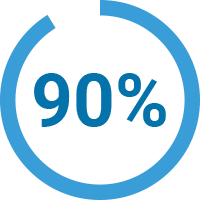

# <img src="https://thumbs.dreamstime.com/t/bright-colorful-thank-you-banner-vector-overlapping-letters-118244535.jpg">

## **<div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">10 | Hierarchical Clustering </div>**

In [122]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
linkage_matrix = linkage(X_scaled, method='ward')

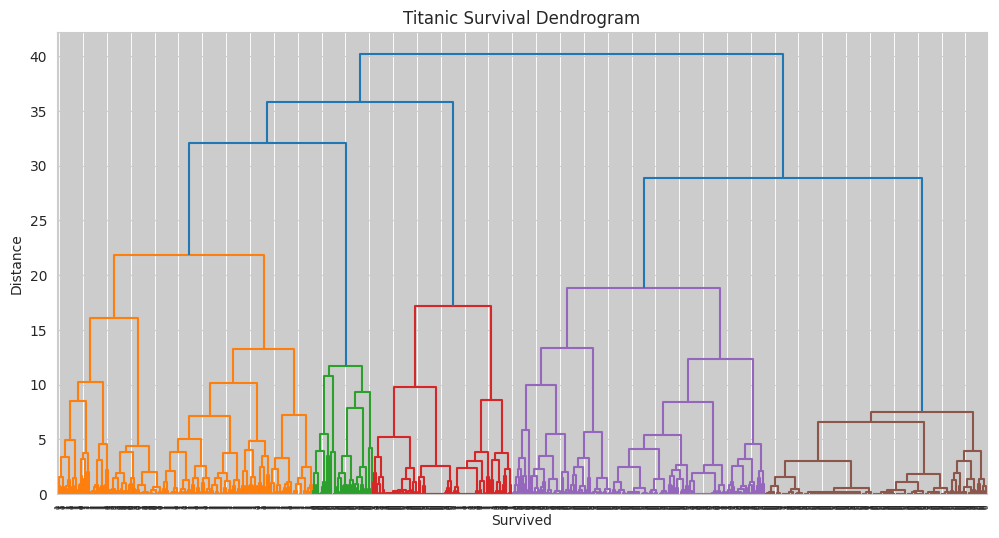

In [125]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df['Survived'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Titanic Survival Dendrogram')
plt.xlabel('Survived')
plt.ylabel('Distance')
plt.show()